<a href="https://colab.research.google.com/github/ZIDANIDROS/BelajarDataScience/blob/main/4522210012_husein_zidan_machine_learning_uts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UJIAN TENGAH SEMESTER <br>
Nama : Husein Zidan <br>
NPM  : 4522210012 <br>
Mata Kuliah : Pembelajaran Mesin <br>
Dosen Pengampu : Ninuk Wiliani , S.Si., M.Kom., Phd.

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [130]:
df = pd.read_csv('Heart_Attack.csv', sep=',')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


# Data Understanding

In [131]:
# melihat informasi data
print('Info')
df.info()
print('=====================')

# melihat deskripsi data
print('Deskripsi')
df.describe()

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
Deskripsi


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [132]:
# melihat missing value

print("Missing values:\n", df.isnull().sum())

Missing values:
 age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64


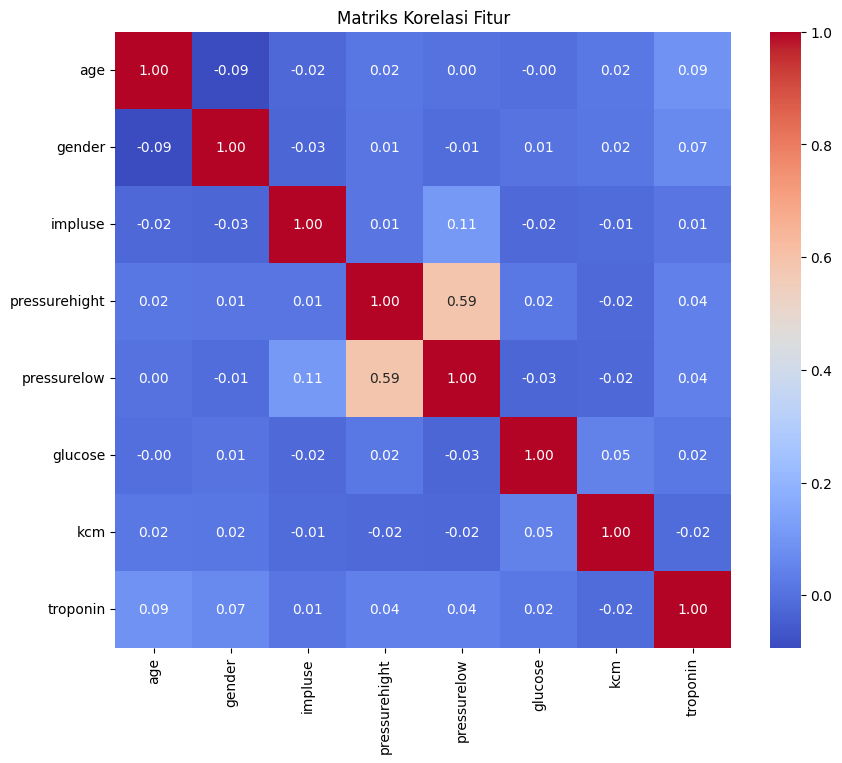

In [133]:
# Membuat Heatmap supaya jelas korelasi anatar atribut

numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriks Korelasi Fitur')
plt.show()

# Data Cleaning

In [134]:
# merubah supaya label menjadi 0(negative) dan 1(positive)

df['class'] = df['class'].map({'negative': 0, 'positive': 1})
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


In [135]:
# Mendefinisikan kolom numerik
numeric_cols = df.columns[:-1]  # Mengambil semua kolom kecuali kolom 'class'

# Menghitung z-score
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Menentukan threshold untuk outlier (misalnya 3)
threshold = 3
outliers = (z_scores > threshold)

# Memisahkan outlier dan inlier
outlier_indices = np.any(outliers, axis=1)
outliers = df[outlier_indices]
inliers = df[~outlier_indices]

In [136]:
print("Outliers:")
outliers

Outliers:


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
7,63,1,60,214,82,87.0,300.000,2.370,1
12,64,1,60,199,99,92.0,3.430,5.370,1
28,47,0,66,134,57,279.0,300.000,0.007,1
29,63,1,66,135,55,166.0,0.493,10.000,0
30,54,1,125,131,82,95.0,1.310,8.300,1
...,...,...,...,...,...,...,...,...,...
1294,50,0,79,92,55,415.0,16.950,0.005,1
1302,40,1,57,208,40,108.0,2.110,0.003,0
1310,70,0,80,135,75,351.0,2.210,10.000,1
1316,45,1,85,168,104,96.0,1.240,4.250,1


In [137]:
print("Inliers:")
inliers

Inliers:


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1312,48,1,84,118,68,96.0,5.33,0.006,0
1313,86,0,40,179,68,147.0,5.22,0.011,0
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1


In [138]:
# Normalisasi menggunakan Z-Score
normalized_inliers = inliers.copy()
normalized_inliers[inliers.columns[:-1]] = inliers[inliers.columns[:-1]].apply(zscore)

normalized_inliers

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,0.600057,0.720795,-0.648741,1.408974,0.815876,0.343208,-0.373527,-0.389481,0
1,-2.609267,0.720795,1.194659,-1.174266,-1.931959,2.581966,-0.081260,1.520261,1
2,-0.071662,0.720795,-0.780413,1.408974,0.370281,2.153968,-0.362309,-0.405882,0
3,0.600057,0.720795,-0.385398,-0.257632,-1.263566,2.153968,0.339132,-0.189031,1
4,-0.071662,0.720795,-0.780413,-0.590954,-0.520908,2.647812,-0.416039,-0.405882,0
...,...,...,...,...,...,...,...,...,...
1312,-0.594110,0.720795,0.536302,-0.340963,-0.298111,-0.710325,-0.165103,-0.400415,0
1313,2.242036,-1.387356,-2.360470,2.200612,-0.298111,0.129209,-0.171597,-0.391303,0
1314,-0.892652,0.720795,1.194659,-0.174302,-0.372377,1.067512,-0.383565,-0.400415,0
1315,0.749327,0.720795,0.536302,-0.049307,-1.263566,0.162132,-0.401278,-0.097917,1


# Modeling

<h1>SVM vs KNN</h1><br>

In [139]:
# Asumsi normalized_inliers sudah didefinisikan
X = normalized_inliers.drop(columns=['class'])  # Fitur
y = normalized_inliers['class']  # Label

In [140]:
algorithms = {
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

In [141]:
ratios = [0.6, 0.7, 0.8]
results = []

In [142]:
# Fungsi untuk mengevaluasi model
def evaluate_model(model_name, model, ratio):
    # Bagi data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)

    # Pelatihan model
    model.fit(X_train, y_train)

    # Prediksi
    predictions = model.predict(X_test)

    # Hitung akurasi
    accuracy = accuracy_score(y_test, predictions)

    # Simpan hasil
    results.append([model_name, f"{int(ratio * 100)} : {int((1 - ratio) * 100)}", accuracy])

    # Cetak laporan klasifikasi
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, predictions))

    # Hitung confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Visualisasi confusion matrix
    plot_confusion_matrix(cm, title=f'{model_name} Confusion Matrix')

In [143]:
# Buat fungsi untuk menggambar confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       184
           1       0.78      0.80      0.79       298

    accuracy                           0.74       482
   macro avg       0.72      0.72      0.72       482
weighted avg       0.74      0.74      0.74       482



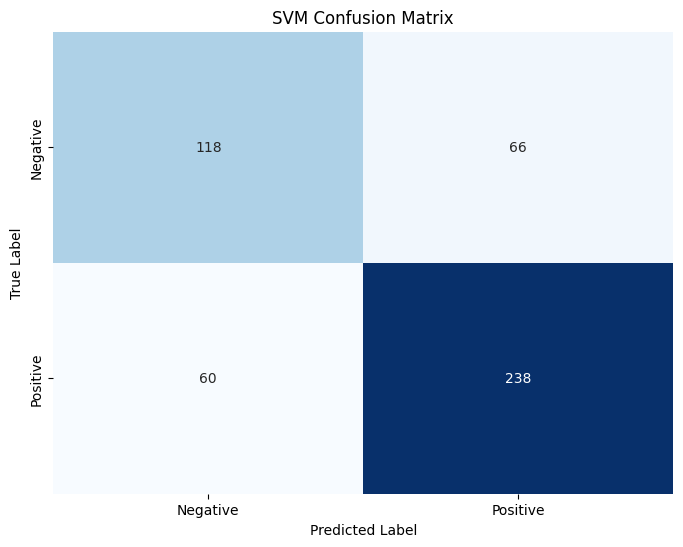

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       145
           1       0.79      0.77      0.78       217

    accuracy                           0.74       362
   macro avg       0.73      0.73      0.73       362
weighted avg       0.74      0.74      0.74       362



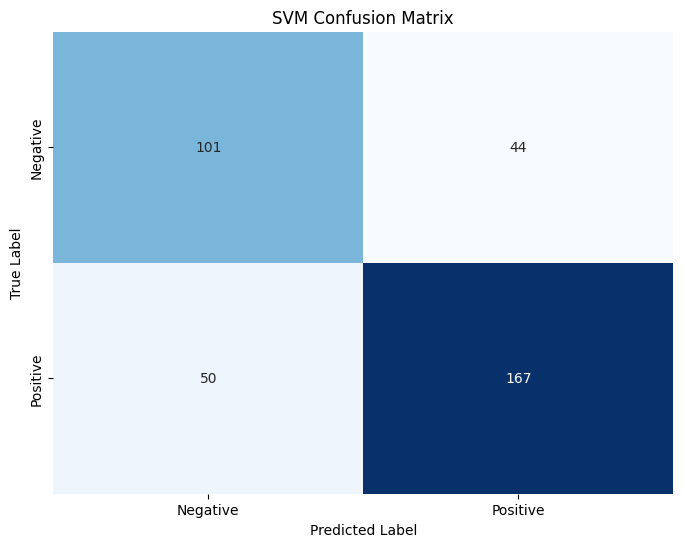

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68        94
           1       0.81      0.73      0.77       147

    accuracy                           0.73       241
   macro avg       0.72      0.73      0.72       241
weighted avg       0.74      0.73      0.73       241



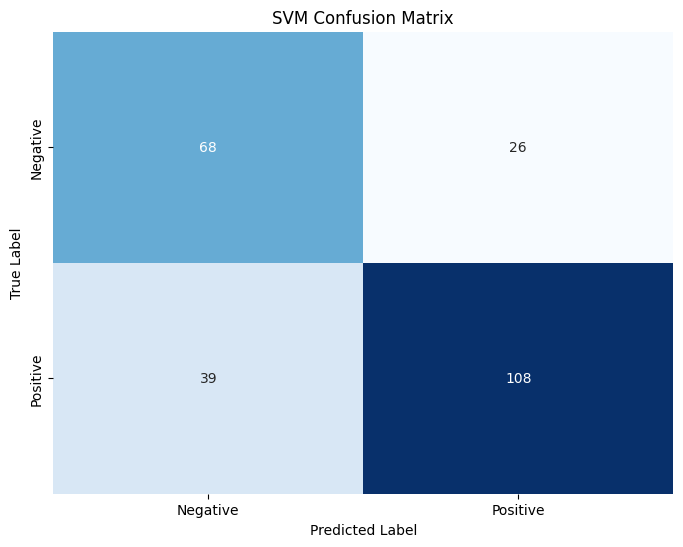

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.64      0.59       184
           1       0.75      0.67      0.71       298

    accuracy                           0.66       482
   macro avg       0.65      0.66      0.65       482
weighted avg       0.67      0.66      0.66       482



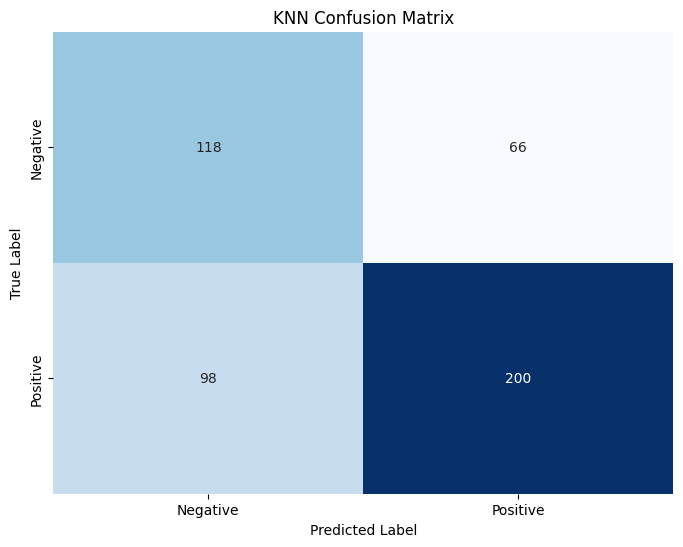

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.63      0.60       145
           1       0.73      0.68      0.71       217

    accuracy                           0.66       362
   macro avg       0.65      0.65      0.65       362
weighted avg       0.67      0.66      0.66       362



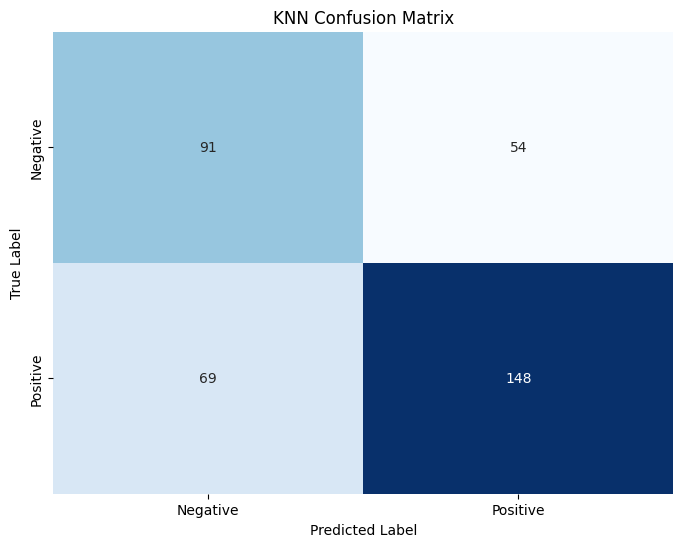

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.68      0.62        94
           1       0.77      0.68      0.72       147

    accuracy                           0.68       241
   macro avg       0.67      0.68      0.67       241
weighted avg       0.69      0.68      0.68       241



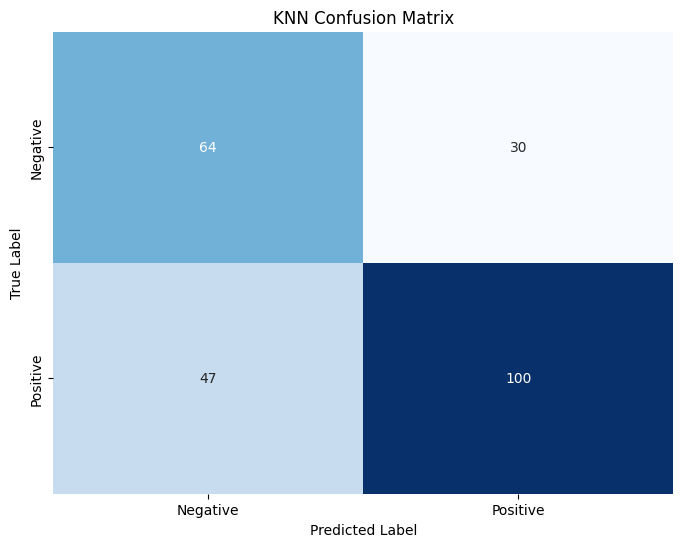

In [144]:
# Evaluasi setiap algoritma untuk setiap rasio
for algo_name, algo_model in algorithms.items():
    for ratio in ratios:
        evaluate_model(algo_name, algo_model, ratio)

In [145]:
# Membuat DataFrame dari hasil
results_df = pd.DataFrame(results, columns=['Algoritma', 'Ratio', 'Akurasi'])

In [146]:
# Tampilkan tabel hasil
print(results_df)

  Algoritma    Ratio   Akurasi
0       SVM  60 : 40  0.738589
1       SVM  70 : 30  0.740331
2       SVM  80 : 19  0.730290
3       KNN  60 : 40  0.659751
4       KNN  70 : 30  0.660221
5       KNN  80 : 19  0.680498
